In [1]:
import pandas as pd
df = pd.read_csv('survey_results_public.csv' , index_col='Respondent')
schema_df = pd.read_csv('survey_results_schema.csv',index_col='Column')
df.head()


,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Taken an online course in programming or softw...,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [2]:
pd.set_option("display.max_columns", None)
df


,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Int

### Task - 01

***Show all developers around the world and show using grpah how much developers uses python and java

* Grouping Countries

In [3]:
country_grp = df.groupby('Country')
country_grp['Employment'].value_counts().loc['India']

Employment
Employed full-time                                      6613
Not employed, but looking for work                       970
Independent contractor, freelancer, or self-employed     639
Not employed, and not looking for work                   416
Employed part-time                                       165
Retired                                                    5
Name: Employment, dtype: int64

* Number of respondant from each countries

In [4]:
All_developers = df['Country'].value_counts()
All_developers

United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Brunei Darussalam                       1
Tonga                                   1
Saint Kitts and Nevis                   1
Chad                                    1
Saint Vincent and the Grenadines        1
Name: Country, Length: 179, dtype: int64

* Number of respondant using python from each countries

In [5]:
Python_User = country_grp['LanguageWorkedWith'].apply(lambda x : x.str.contains('Python').sum())
Python_User

Country
Afghanistan                              8
Albania                                 23
Algeria                                 40
Andorra                                  0
Angola                                   2
                                        ..
Venezuela, Bolivarian Republic of...    28
Viet Nam                                78
Yemen                                    3
Zambia                                   4
Zimbabwe                                14
Name: LanguageWorkedWith, Length: 179, dtype: int64

* Concating two data from both columns

In [6]:
developers_survey = pd.concat([All_developers , Python_User] , axis='columns' , sort=False)
developers_survey = developers_survey.head(10)
developers_survey

,Country,LanguageWorkedWith
United States,20949,10083
India,9061,3105
Germany,5866,2451
United Kingdom,5737,2384
Canada,3395,1558
France,2391,1054
Brazil,1948,767
Poland,1922,751
Australia,1903,790
Netherlands,1852,767


In [7]:
developers_survey.rename(columns={'Country':'All_developers' , 'LanguageWorkedWith':'Python'},inplace=True)
developers_survey

,All_developers,Python
United States,20949,10083
India,9061,3105
Germany,5866,2451
United Kingdom,5737,2384
Canada,3395,1558
France,2391,1054
Brazil,1948,767
Poland,1922,751
Australia,1903,790
Netherlands,1852,767


* Now adding Java details to our survey table

In [8]:
Java = country_grp['LanguageWorkedWith'].apply(lambda x : x.str.contains('Java').sum())
Java

Country
Afghanistan                              31
Albania                                  74
Algeria                                 100
Andorra                                   2
Angola                                    2
                                       ... 
Venezuela, Bolivarian Republic of...     78
Viet Nam                                171
Yemen                                    13
Zambia                                   10
Zimbabwe                                 32
Name: LanguageWorkedWith, Length: 179, dtype: int64

* Concating java details to our survey table

In [9]:
developers_survey = pd.concat([developers_survey , Java] , axis='columns' , sort=False)
developers_survey

,All_developers,Python,LanguageWorkedWith
United States,20949.0,10083.0,16640
India,9061.0,3105.0,7275
Germany,5866.0,2451.0,4549
United Kingdom,5737.0,2384.0,4454
Canada,3395.0,1558.0,2690
...,...,...,...
"Venezuela, Bolivarian Republic of...",NaN,NaN,78
Viet Nam,NaN,NaN,171
Yemen,NaN,NaN,13
Zambia,NaN,NaN,10


In [10]:
developers_survey.rename(columns={'LanguageWorkedWith':'Java'},inplace=True)
developers_survey.head(20)

,All_developers,Python,Java
United States,20949.0,10083.0,16640
India,9061.0,3105.0,7275
Germany,5866.0,2451.0,4549
United Kingdom,5737.0,2384.0,4454
Canada,3395.0,1558.0,2690
France,2391.0,1054.0,1900
Brazil,1948.0,767.0,1606
Poland,1922.0,751.0,1436
Australia,1903.0,790.0,1503
Netherlands,1852.0,767.0,1459


In [11]:
c = ['United States' , 'India' , 'Germany' , 'United Kingdom' , 'Canada' , 'Brazil' , 'Australia']

In [12]:
developers_survey = developers_survey.loc[c]
developers_survey

,All_developers,Python,Java
United States,20949.0,10083.0,16640
India,9061.0,3105.0,7275
Germany,5866.0,2451.0,4549
United Kingdom,5737.0,2384.0,4454
Canada,3395.0,1558.0,2690
Brazil,1948.0,767.0,1606
Australia,1903.0,790.0,1503


* Now converting our index as columns

In [13]:
developers_survey.reset_index(level=0, inplace=True)

In [14]:
developers_survey.rename(columns={'index':'Countries'},inplace=True)

In [15]:
developers_survey

,Countries,All_developers,Python,Java
0,United States,20949.0,10083.0,16640
1,India,9061.0,3105.0,7275
2,Germany,5866.0,2451.0,4549
3,United Kingdom,5737.0,2384.0,4454
4,Canada,3395.0,1558.0,2690
5,Brazil,1948.0,767.0,1606
6,Australia,1903.0,790.0,1503


In [21]:
developers_survey.to_csv('D:\Waqar\Squad\Pandas\DataFrame\Developers_survey.csv')

In [16]:
from matplotlib import pyplot as plt
import numpy as np

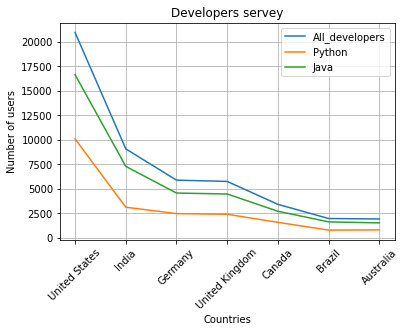

In [17]:

plt.plot(developers_survey['Countries'] , developers_survey['All_developers'] , label='All_developers')
plt.plot(developers_survey['Countries'] , developers_survey['Python'] , label='Python')
plt.plot(developers_survey['Countries'] , developers_survey['Java'] , label='Java')

plt.legend()
plt.xlabel('Countries')
plt.ylabel('Number of users')
plt.title('Developers servey')
plt.xticks(rotation=45)
plt.grid()
plt.show()

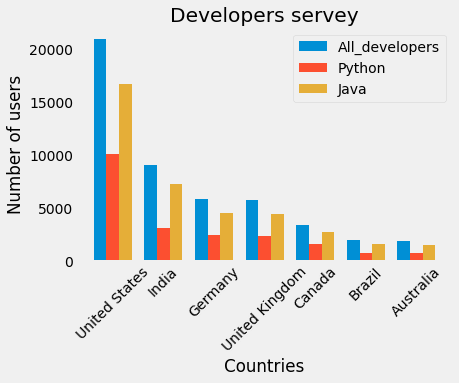

In [18]:
plt.style.use('fivethirtyeight')
x_value = np.arange(len(developers_survey['Countries']))
width = 0.25

plt.bar(x_value - width ,  developers_survey['All_developers'] , width=width , label='All_developers')
plt.bar(x_value ,  developers_survey['Python'] , width = width , label='Python')
plt.bar(x_value + width ,developers_survey['Java'] , width = width , label='Java')

plt.legend()
plt.xlabel('Countries')
plt.ylabel('Number of users')
plt.title('Developers servey')
plt.xticks(ticks=x_value , labels=developers_survey['Countries'] , rotation=45)
plt.grid()
plt.show()

In [19]:
len(developers_survey['Countries'])

7

In [20]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
